In [65]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)           

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import ScalarFormatter, FuncFormatter

sns.set(style="white")

/kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv


<img src="https://seismic.com/wp-content/uploads/2014/09/3-Ways-to-Improve-Sales-Synergy.png" alt="Sales Image" width="800"/>

# üíπ Sales ü§ñ EDA, 4AB Testing & Predictive Modeling

> In this notebook we are going to work with [Kaggles Clicks Conversion Tracking dataset](https://www.kaggle.com/datasets/loveall/clicks-conversion-tracking/data) which contains data from an anonymous organisation‚Äôs social media ad campaign. The objective of this notebook is to perform
>
> - üìä‚ú® informative and nicely-looking descriptive analysis and EDA
> 
> - üíπüîç conversion rate, segment, cost efficiency and campaign performance analysis 
> 
> - üîÑüß™ A/B testing 
> 
> - ü§ñüìà predictive modeling

In [2]:
sales = pd.read_csv('/kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv')
print(f"Rows: {sales.shape[0]:,}")
print(f"Cols: {sales.shape[1]:,}")
print(sales.dtypes)
sales.head(3)

Rows: 1,143
Cols: 11
ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object


ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0  708746              916          103916  30-34      M        15   
1  708749              916          103917  30-34      M        16   
2  708771              916          103920  30-34      M        20   

   Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  
0         7350       1   1.43                 2                    1  
1        17861       2   1.82                 2                    0  
2          693       0   0.00                 1                    0

# Descriptive Analysis

In this section we are going to take a look at some summary statistics for the numerical variables. Additionally we are going to investigate the cardinalities of the categorical columnns.

In [3]:
# --- Basic statistics ---
pd.DataFrame(
    {
        'Data Type': sales.dtypes,
        'Missing Count (#)': sales.isnull().sum(),
        'Missing Rate (%)': 100 * sales.isnull().mean(),
        'Unique Count (#)': sales.nunique(),
        'Unique Rate (%)': round(100 * sales.nunique() / sales.shape[0], 2),
        'Duplicates Count (#)': [sales[c].duplicated().sum() for c in sales.columns],
        'Duplicates Rate (%)': [round(100 * sales[c].duplicated().sum() / sales.shape[0], 2) for c in sales.columns],
    }
)

Data Type  Missing Count (#)  Missing Rate (%)  \
ad_id                   int64                  0               0.0   
xyz_campaign_id         int64                  0               0.0   
fb_campaign_id          int64                  0               0.0   
age                    object                  0               0.0   
gender                 object                  0               0.0   
interest                int64                  0               0.0   
Impressions             int64                  0               0.0   
Clicks                  int64                  0               0.0   
Spent                 float64                  0               0.0   
Total_Conversion        int64                  0               0.0   
Approved_Conversion     int64                  0               0.0   

                     Unique Count (#)  Unique Rate (%)  Duplicates Count (#)  \
ad_id                            1143           100.00                     0   
xyz_campaign_id                     3             0.26                  1140   
fb_campaign_id                    691            60.45                   452   
age                                 4             0.35                  1139   
gender                              2             0.17                  1141   
interest                           40             3.50                  1103   
Impressions                      1130            98.86                    13   
Clicks                            183            16.01                   960   
Spent                             869            76.03                   274   
Total_Conversion                   32             2.80                  1111   
Approved_Conversion                16             1.40                  1127   

                     Duplicates Rate (%)  
ad_id                               0.00  
xyz_campaign_id                    99.74  
fb_campaign_id                     39.55  
age                                99.65  
gender                             99.83  
interest                           96.50  
Impressions                         1.14  
Clicks                             83.99  
Spent                              23.97  
Total_Conversion                   97.20  
Approved_Conversion                98.60

- There are no missing values in the dataset üòä. 
- The dataset contains data of __1143 adds__.
- There are only __3 xyz campaigns__ in the dataset.
- There are __691 Facebook campaigns__ in the dataset.
- The customers are segmented into 4 age buckets.

## Numerical Variables

In [7]:
sales_numericals = sales.select_dtypes(include=['int64', 'float64'])

sales_numericals.describe().apply(lambda s: s.apply(lambda x: f"{x:,.2f}"))

ad_id xyz_campaign_id fb_campaign_id  interest   Impressions  \
count      1,143.00        1,143.00       1,143.00  1,143.00      1,143.00   
mean     987,261.13        1,067.38     133,783.99     32.77    186,732.13   
std      193,992.81          121.63      20,500.31     26.95    312,762.18   
min      708,746.00          916.00     103,916.00      2.00         87.00   
25%      777,632.50          936.00     115,716.00     16.00      6,503.50   
50%    1,121,185.00        1,178.00     144,549.00     25.00     51,509.00   
75%    1,121,804.50        1,178.00     144,657.50     31.00    221,769.00   
max    1,314,415.00        1,178.00     179,982.00    114.00  3,052,003.00   

         Clicks     Spent Total_Conversion Approved_Conversion  
count  1,143.00  1,143.00         1,143.00            1,143.00  
mean      33.39     51.36             2.86                0.94  
std       56.89     86.91             4.48                1.74  
min        0.00      0.00             0.00                0.00  
25%        1.00      1.48             1.00                0.00  
50%        8.00     12.37             1.00                1.00  
75%       37.50     60.02             3.00                1.00  
max      421.00    639.95            60.00               21.00

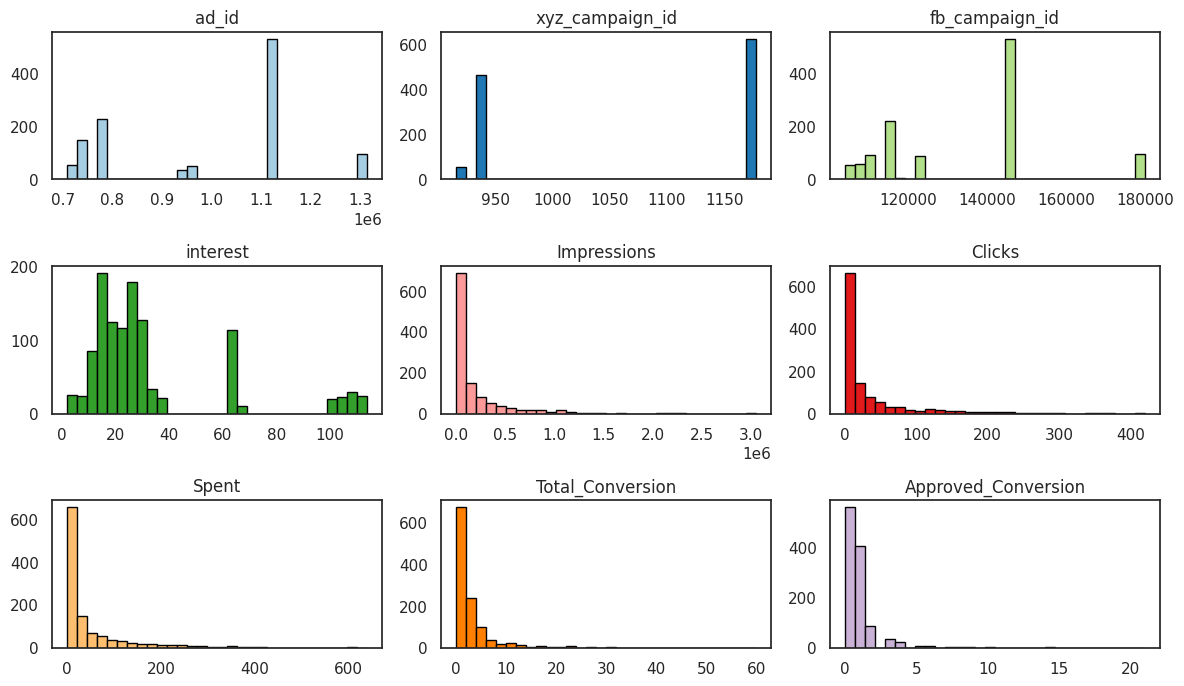

In [23]:
fig, axes = plt.subplots(3, 3, figsize=(12, 7))
axes = axes.flatten()

colors = sns.color_palette("Paired", 9)

for i, col in enumerate(sales_numericals):
    ax = axes[i]
    ax.hist(sales[col].dropna(), bins=30, color=colors[i % len(colors)], edgecolor='black')
    ax.set_title(col)
    
    # Disable scientific notation on y-axis.
    ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    ax.ticklabel_format(style='plain', axis='y')    

for j in range(i + 1, len(axes)): axes[j].set_visible(False)

plt.tight_layout(pad=1.0)
plt.show()

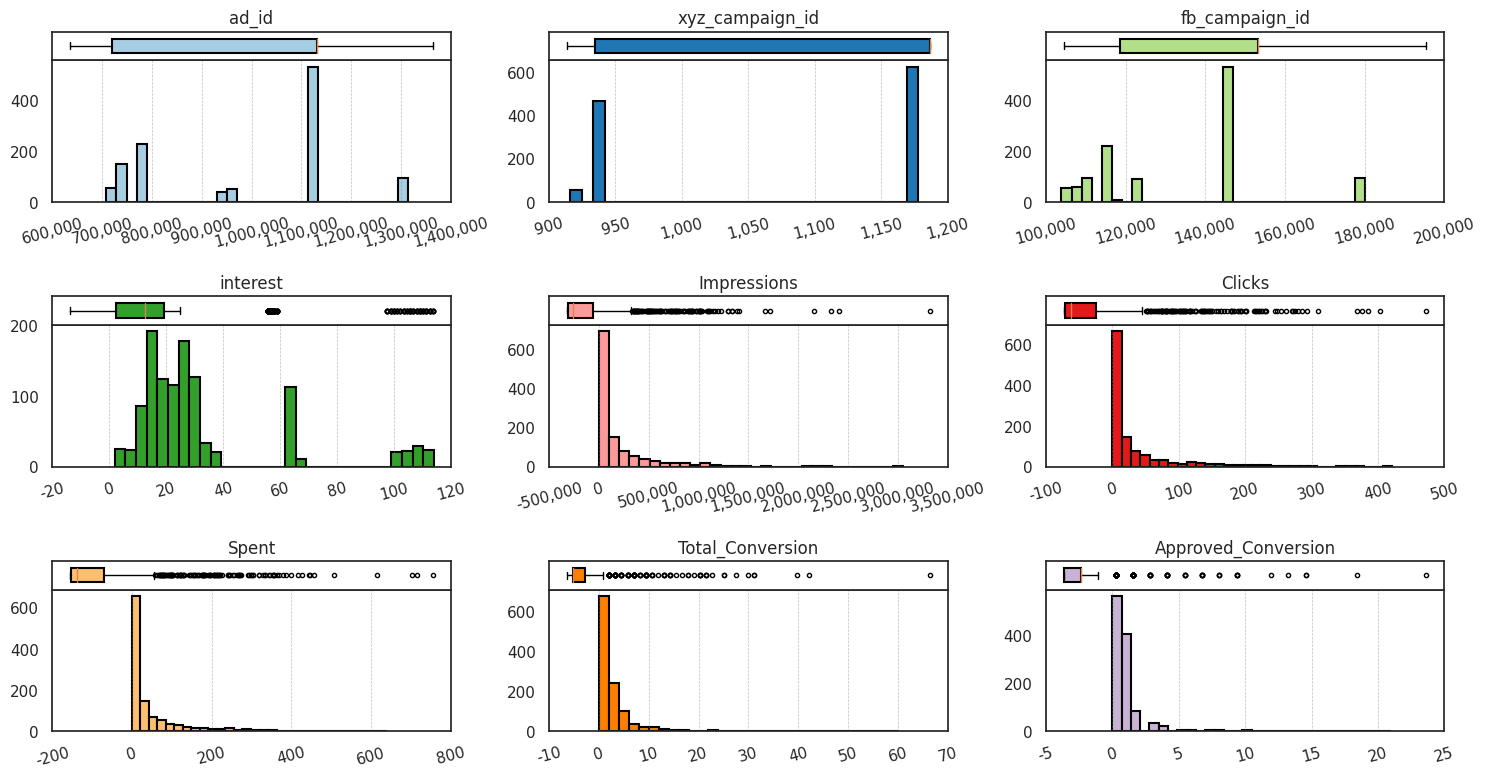

In [76]:
fig, axes = plt.subplots(3, 3, figsize=(15, 8))
axes = axes.flatten()

def comma_formatter(x, pos):
    return f'{x:,.0f}'

for i, col in enumerate(sales_numericals):
    ax_hist = axes[i]
    
    # --- Boxplot ---
    ax_box = ax_hist.inset_axes([0, 1, 1, 0.2])
    ax_box.boxplot(
        sales[col].dropna(), 
        vert=False, 
        patch_artist=True, 
        widths=0.5,
        boxprops=dict(facecolor=colors[i], linewidth=1.5), 
        flierprops=dict(marker='o', markersize=3, linestyle='none')
    )
    ax_box.set_yticks([])
    ax_box.set_xticks([])

    # --- Histogram ---
    ax_hist.hist(sales[col].dropna(), bins=30, color=colors[i], linewidth=1.5, edgecolor='black')
    ax_hist.set_title(col)
    ax_hist.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    ax_hist.ticklabel_format(style='plain', axis='y')  
    
    # Disable scientific notation on both x and y-axis.
    ax_hist.ticklabel_format(style='plain', axis='x')
    ax_hist.ticklabel_format(style='plain', axis='y')
    
    # Ensure that no offset is used.
    ax_hist.xaxis.get_major_formatter().set_useOffset(False)
    ax_hist.yaxis.get_major_formatter().set_useOffset(False)  
    ax_hist.xaxis.set_major_formatter(FuncFormatter(comma_formatter))
    
    # Set the x-ticks explicitly and add vertical lines at each x-tick.
    xticks = ax_hist.get_xticks()
    ax_hist.set_xticks(xticks)
    ax_hist.set_xticklabels([f'{int(x):,}' for x in xticks])
    plt.setp(ax_hist.get_xticklabels(), rotation=15, ha='center')
    
    for tick in xticks:
        ax_hist.axvline(x=tick, color='grey', alpha=0.5, linestyle='--', linewidth=0.5)
        
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(pad=1.0)
plt.show()

- We see that one `ad_id` and one `fb_campaign_id` are in the large majority of the dataset.

## Categorical Variables

In [79]:
sales_categoricals = sales.select_dtypes(exclude=['int64', 'float64'])

sales_categoricals.value_counts()

age    gender
30-34  M         229
       F         197
35-39  M         139
45-49  F         138
       M         121
35-39  F         109
40-44  F         107
       M         103
Name: count, dtype: int64

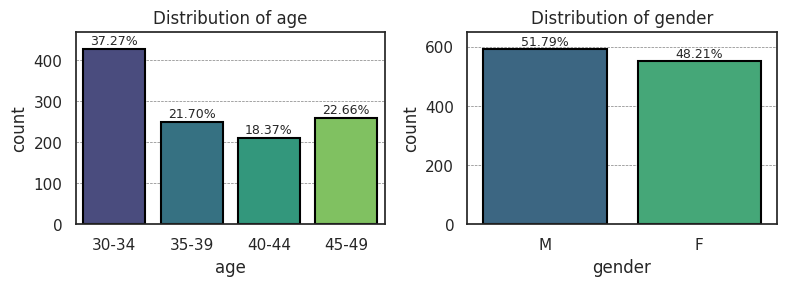

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes = axes.flatten()

for i, col in enumerate(sales_categoricals):
    ax = axes[i]
    
    plot = sns.countplot(data=sales, x=col, 
                         palette='viridis', edgecolor='black', linewidth=1.5, 
                         ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.grid(axis='y', color='grey', linestyle='--', linewidth=0.5)    
    
    # Add percentage at the top of each bar.
    total = len(sales[col])
    max_height = 0
    for p in plot.patches:
        height = p.get_height()
        max_height = max(max_height, height)
        percentage = 100 * height / total
        ax.text(p.get_x() + p.get_width() / 2., height + 12, 
                f'{percentage:.2f}%', ha='center', fontsize=9)

    ax.set_ylim(0, max_height * 1.10)
    

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(pad=1.0)
plt.show()

# Exploratory Data Analysis (EDA)

# Conversion Rate Analysis

# Segment Analysis

# Cost Efficiency Analysis

# Campaign Performance Analysis

# A/B Testing Analysis

# Predictive Modeling

---


üíö Thank you for reading üíö

If you have any questions or feedback, feel free to leave a comment ü§î

This notebook is __still in progress__.

Please __UPVOTE__ if you enjoyed this notebook üôè